In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
print(os.getcwd())
notebook_path = os.path.abspath("test.ipynb")
print(notebook_path)

file = os.path.join(os.getcwd(), "0_trackFiles/0_AUS/track_boundaries.csv")
print(file)

/ws
/ws/test.ipynb
/ws/0_trackFiles/0_AUS/track_boundaries.csv


In [11]:
circuit = pd.read_csv(file, encoding='utf-8')
circuit.head(1)

,X,Y,Z
0,-396.932404,793.436523,3.126878


In [67]:
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

session = fastf1.get_session(2024, 'Australia', 'Q')
session.load(weather=False)
verstappen = session.get_driver('VER')
print(f"Pronto {verstappen['FirstName']}?")

fast_ver = session.laps.pick_drivers('LEC').pick_fastest()
ver_car_data = fast_ver.get_car_data()
t = ver_car_data['Time']
vCar = ver_car_data['Speed']


core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']


Pronto Max?


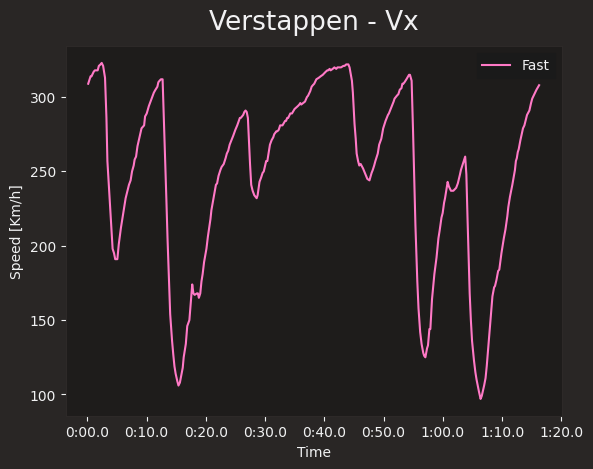

In [65]:
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Verstappen - Vx')
ax.legend()
plt.show()

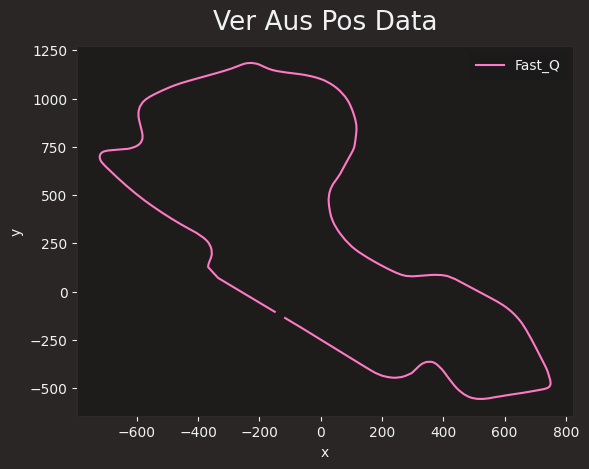

In [73]:
fig, ax = plt.subplots()
ax.plot(x_pos, y_pos, label='Fast_Q')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Ver Aus Pos Data')
ax.legend()
plt.show()

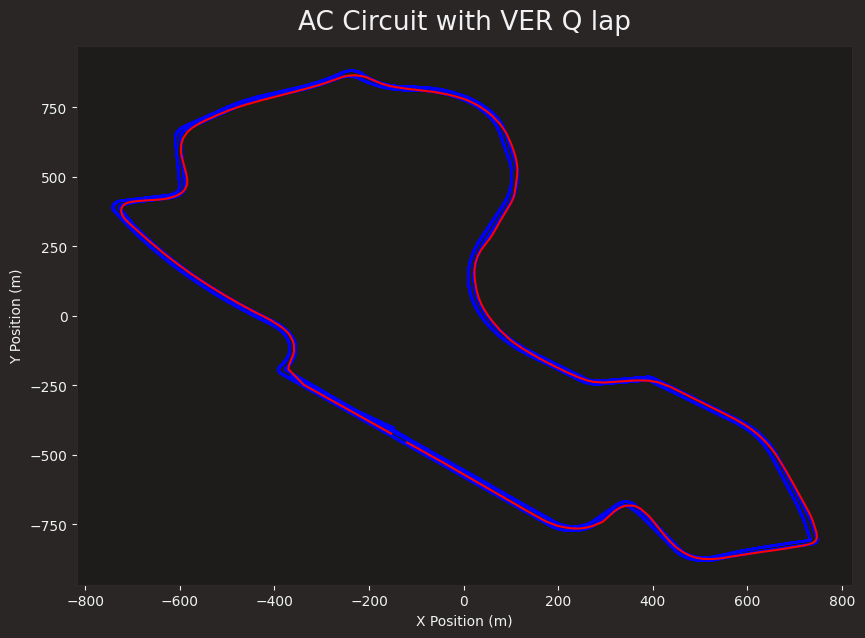

In [100]:
ver_pos_data = fast_ver.get_pos_data()
x_pos = ver_pos_data["X"]/10 - 3
y_pos = ver_pos_data["Y"]/10 - 320

# Plot the left and right track edges
plt.figure(figsize=(10, 7))
plt.plot(circuit["X"], circuit["Y"], 'b.', markersize=1)  # Plot points in blue
plt.plot(x_pos, y_pos, 'r')
plt.title("AC Circuit with VER Q lap")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
#plt.axis([-300, 10, -600, -250])
plt.show()